<a href="https://colab.research.google.com/github/Gagandeep999/AI_Climate_Crisis_2020/blob/main/don't_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Total Emissions 2016-2020", header=0, skipfooter=7)
df_2020 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2020", header=0, skipfooter=7)
df_2019 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2019", header=0, skipfooter=7)
df_2018 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2018", header=0, skipfooter=7)
df_2017 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2017", header=0, skipfooter=7)
df_2016 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2016", header=0, skipfooter=7)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
df_2020.columns

Index(['Year Reported to CDP', 'Account Number', 'Organization', 'City',
       'Country', 'CDP Region', 'Access', 'City-wide emissions inventory',
       'Accounting year', 'Administrative city boundary',
       'Inventory boundary (compared to Administrative city boundary)',
       'Primary Protocol', 'Primary Protocol Comment',
       'Common Reporting Framework inventory format (GPC)', 'Gases Included',
       'Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy',
       'Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)',
       'Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total generation of grid supplied energy',
       'Indirect emissions from use of grid supplied energy (metric tonnes CO2e) for Total Emissions (excluding generation of grid-supplied energy)',
       'Emissions occurring outside city boundary (metric tonnes CO2e) for Total Generation of grid sup

# 2020

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


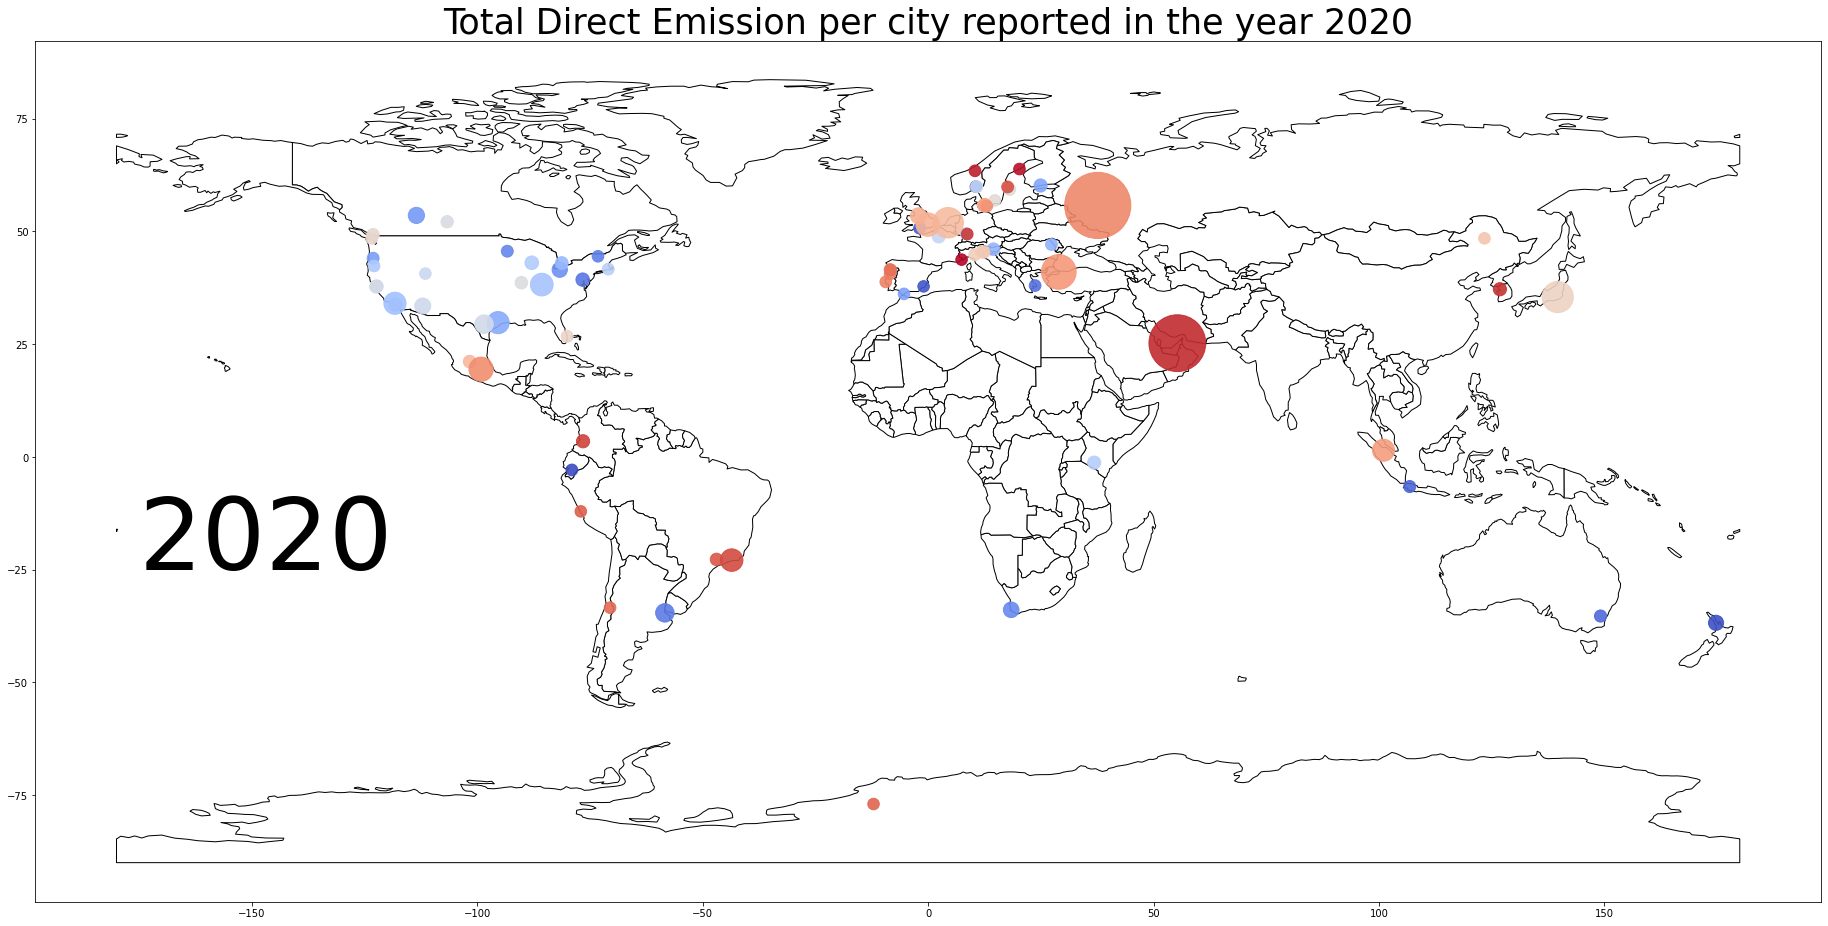

In [ ]:
# df_2020 = pd.read_excel('CDP Community GHG Emissions 2016-2020.xlsx', "Received in 2020", header=0, skipfooter=7)

df_2020['TOTAL'] = 0.0
for index,row in df_2020.iterrows():
    total = row['Direct emissions (metric tonnes CO2e) for Total generation of grid-supplied energy'] + \
            row['Direct emissions (metric tonnes CO2e) for Total emissions (excluding generation of grid-supplied energy)']
    df_2020['TOTAL'][index] = total

    if pd.isna(row['Accounting year'])==False:
      acyear = row['Accounting year']
      year = acyear[:4]
      df_2020['Accounting year'][index] = year
df_2020 = df_2020[['City', 'Country', 'CDP Region', 'Accounting year', 'City Location', 'TOTAL']]
df_2020 = df_2020.dropna()
total_norm = sc.fit_transform(df_2020['TOTAL'].to_numpy().reshape(-1, 1))
df_2020['TOTAL_NORM'] = total_norm
# df_2020
s = df_2020['TOTAL_NORM']
s_exp = pd.Series([200*2**n for n in s])
df_2020['City Location'] = df_2020['City Location'].apply(wkt.loads)
df_2020_gdf = gpd.GeoDataFrame(df_2020, geometry='City Location')

ax = world.plot(color='white', edgecolor='black', figsize=(32,16))

df_2020_gdf.plot(ax=ax, markersize=s_exp, cmap='coolwarm', marker='o', alpha=0.9, label='2020')
plt.text(-175, -25, '2020', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2020', fontdict = {'fontsize' : 35})
plt.savefig('output_2020.jpg', format='jpg', dpi=400)
plt.show()

# 2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


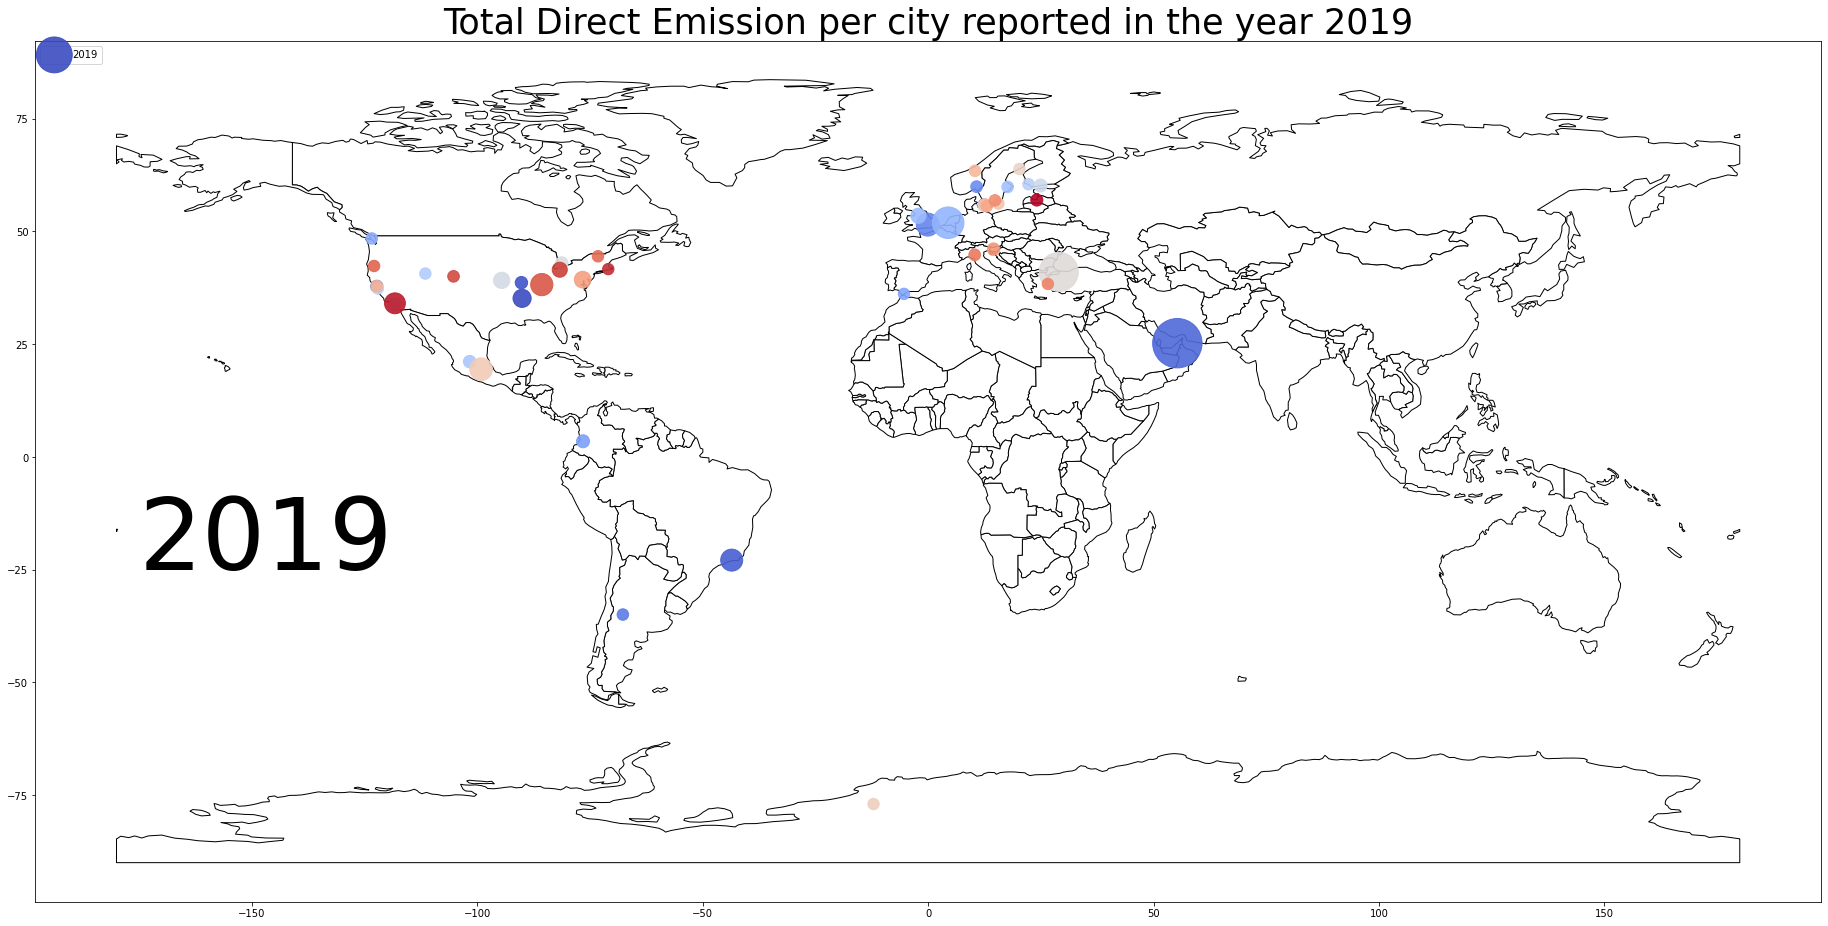

In [ ]:
df_2019.rename(columns={df_2019.columns[15]: "D_Emm_1", df_2019.columns[16]: "D_Emm_2"}, inplace=True)
df_2019['TOTAL'] = 0.0
for index,row in df_2019.iterrows():
    total = row['D_Emm_1'] + row['D_Emm_2']
    df_2019['TOTAL'][index] = total

    if pd.isna(row['Accounting Year'])==False:
      acYear = row['Accounting Year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2019['Accounting Year'][index] = Year

df_2019 = df_2019[['City', 'Country', 'CDP Region', 'Accounting Year', 'City Location', 'TOTAL']]
df_2019 = df_2019.dropna()
total_norm = sc.fit_transform(df_2019['TOTAL'].to_numpy().reshape(-1, 1))
df_2019['TOTAL_NORM'] = total_norm
# df_2019
s = df_2019['TOTAL_NORM']
s_exp = pd.Series([200*2**n for n in s])
df_2019['City Location'] = df_2019['City Location'].apply(wkt.loads)
df_2019_gdf = gpd.GeoDataFrame(df_2019, geometry='City Location')
ax = world.plot(color='white', edgecolor='black', figsize=(32,16))
df_2019_gdf.plot(ax=ax, markersize=s_exp, cmap='coolwarm', marker='o', alpha=0.9, label='2019')
plt.text(-175, -25, '2019', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2019', fontdict = {'fontsize' : 35})
plt.savefig('output_2019.jpg', format='jpg', dpi=400)
plt.legend(loc=2)
plt.show()

# 2018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


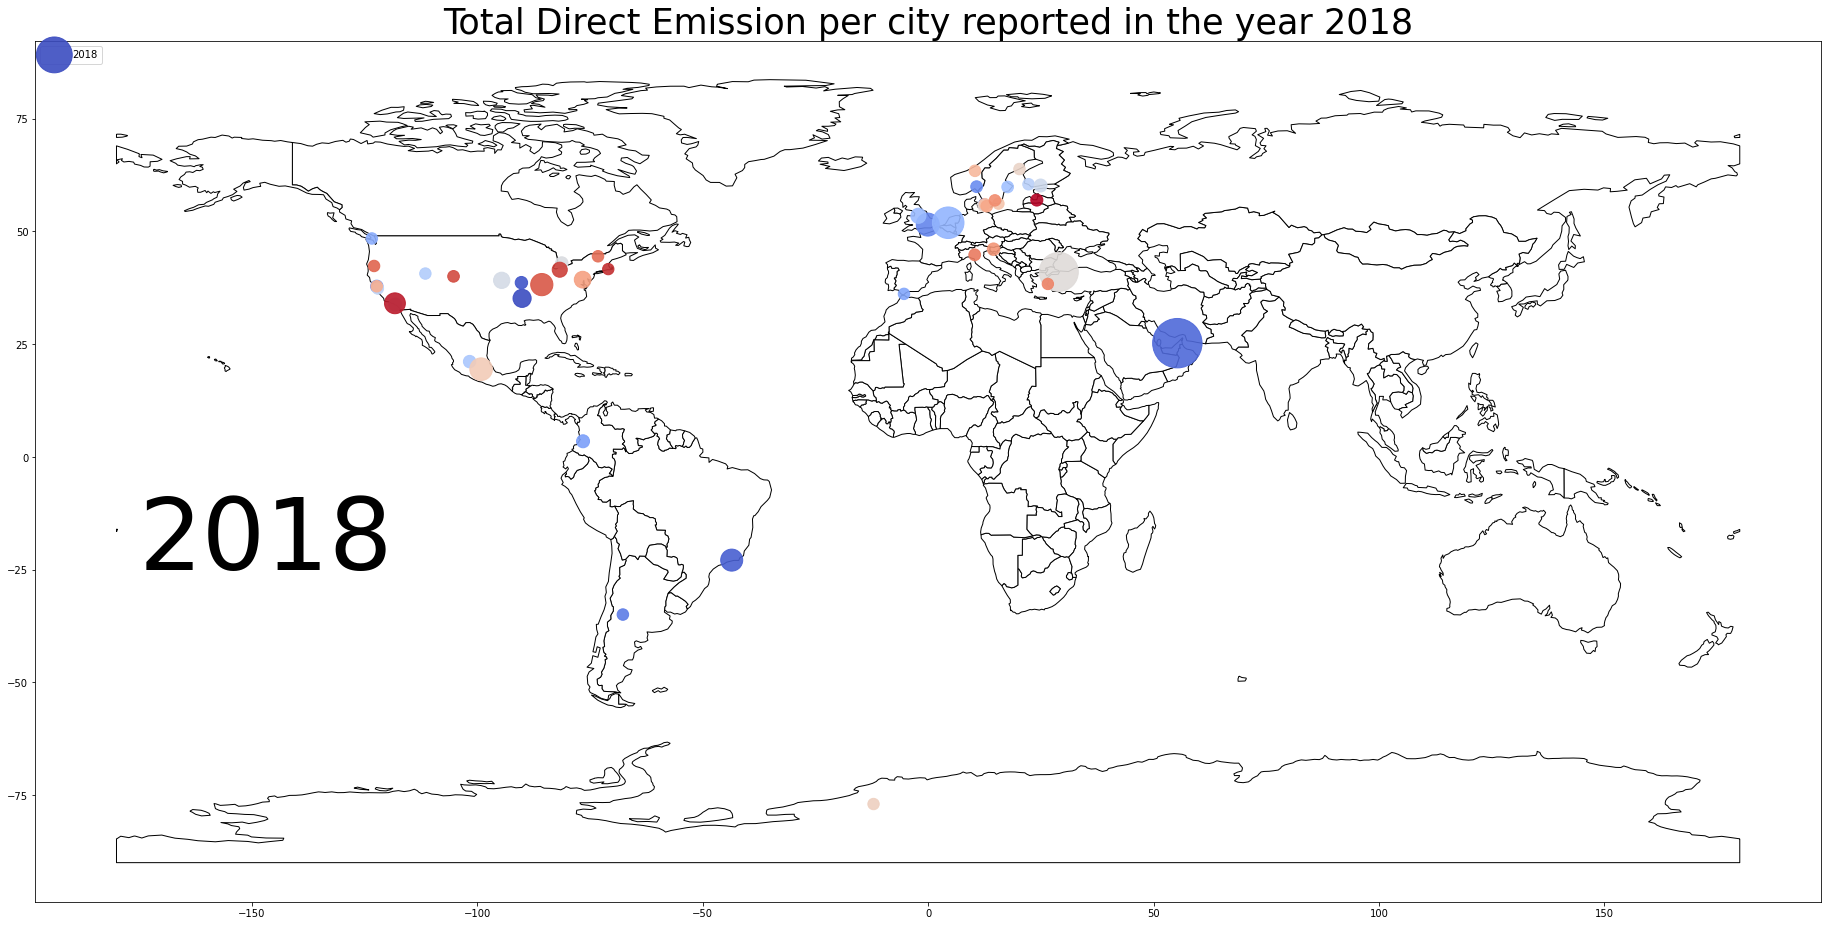

In [ ]:
df_2018.rename(columns={df_2018.columns[15]: "D_Emm_1", df_2018.columns[16]: "D_Emm_2"}, inplace=True)
df_2018['TOTAL'] = 0.0
for index,row in df_2018.iterrows():
    total = row['D_Emm_1'] + row['D_Emm_2']
    df_2018['TOTAL'][index] = total

    if pd.isna(row['Accounting Year'])==False:
      acYear = row['Accounting Year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2018['Accounting Year'][index] = Year

df_2018 = df_2018[['City', 'Country', 'CDP Region', 'Accounting Year', 'City Location', 'TOTAL']]
df_2018 = df_2018.dropna()
total_norm = sc.fit_transform(df_2018['TOTAL'].to_numpy().reshape(-1, 1))
df_2018['TOTAL_NORM'] = total_norm
# df_2018
s = df_2018['TOTAL_NORM']
s_exp = pd.Series([200*2**n for n in s])
df_2018['City Location'] = df_2018['City Location'].apply(wkt.loads)
df_2018_gdf = gpd.GeoDataFrame(df_2018, geometry='City Location')
ax = world.plot(color='white', edgecolor='black', figsize=(32,16))
df_2018_gdf.plot(ax=ax, markersize=s_exp, cmap='coolwarm', marker='o', alpha=0.9, label='2018')
plt.text(-175, -25, '2018', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2018', fontdict = {'fontsize' : 35})
plt.savefig('output_2018.jpg', format='jpg', dpi=400)
plt.legend(loc=2)
plt.show()

# 2017

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


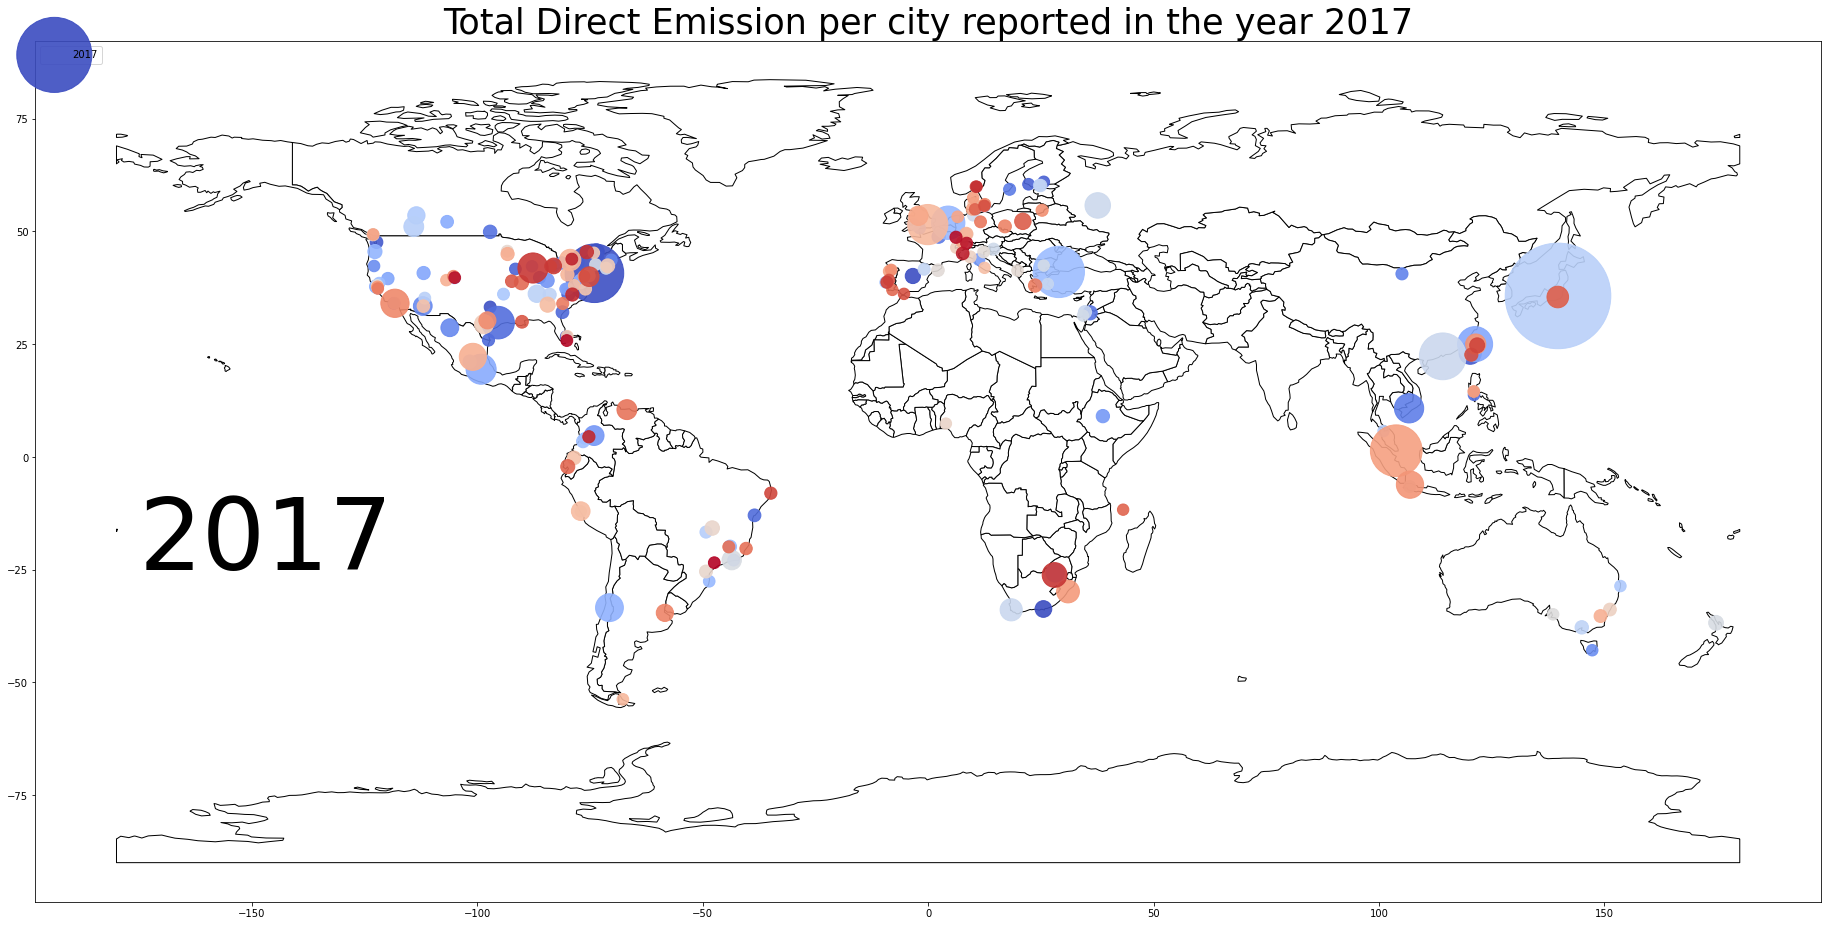

In [ ]:
# df_2017.rename(columns={df_2017.columns[15]: "D_Emm_1", df_2017.columns[16]: "D_Emm_2"}, inplace=True)
df_2017['Longitude'] = 0.0
df_2017['Latitude'] = 0.0
for index,row in df_2017.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2017['Latitude'][index] = lng[:-1]
    df_2017['Longitude'][index] = lat

    if pd.isna(row['Accounting year'])==False:
      acYear = row['Accounting year']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2017['Accounting year'][index] = Year

df_2017 = df_2017[['City', 'Country', 'Region', 'Accounting year', 'Total emissions (metric tonnes CO2e)', 'Longitude', 'Latitude']]
df_2017 = df_2017.dropna()
total_norm = sc.fit_transform(df_2017['Total emissions (metric tonnes CO2e)'].to_numpy().reshape(-1, 1))
df_2017['TOTAL_NORM'] = total_norm
# df_2017
s = df_2017['TOTAL_NORM']
s_exp = pd.Series([200*2**n for n in s])
df_2017_gdf = gpd.GeoDataFrame(
    df_2017, geometry=gpd.points_from_xy(df_2017['Longitude'], df_2017['Latitude']))
ax = world.plot(color='white', edgecolor='black', figsize=(32,16))
df_2017_gdf.plot(ax=ax, markersize=s_exp, cmap='coolwarm', marker='o', alpha=0.9, label='2017')
plt.text(-175, -25, '2017', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2017', fontdict = {'fontsize' : 35})
plt.savefig('output_2017.jpg', format='jpg', dpi=400)
plt.legend(loc=2)
plt.show()

# 2016

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


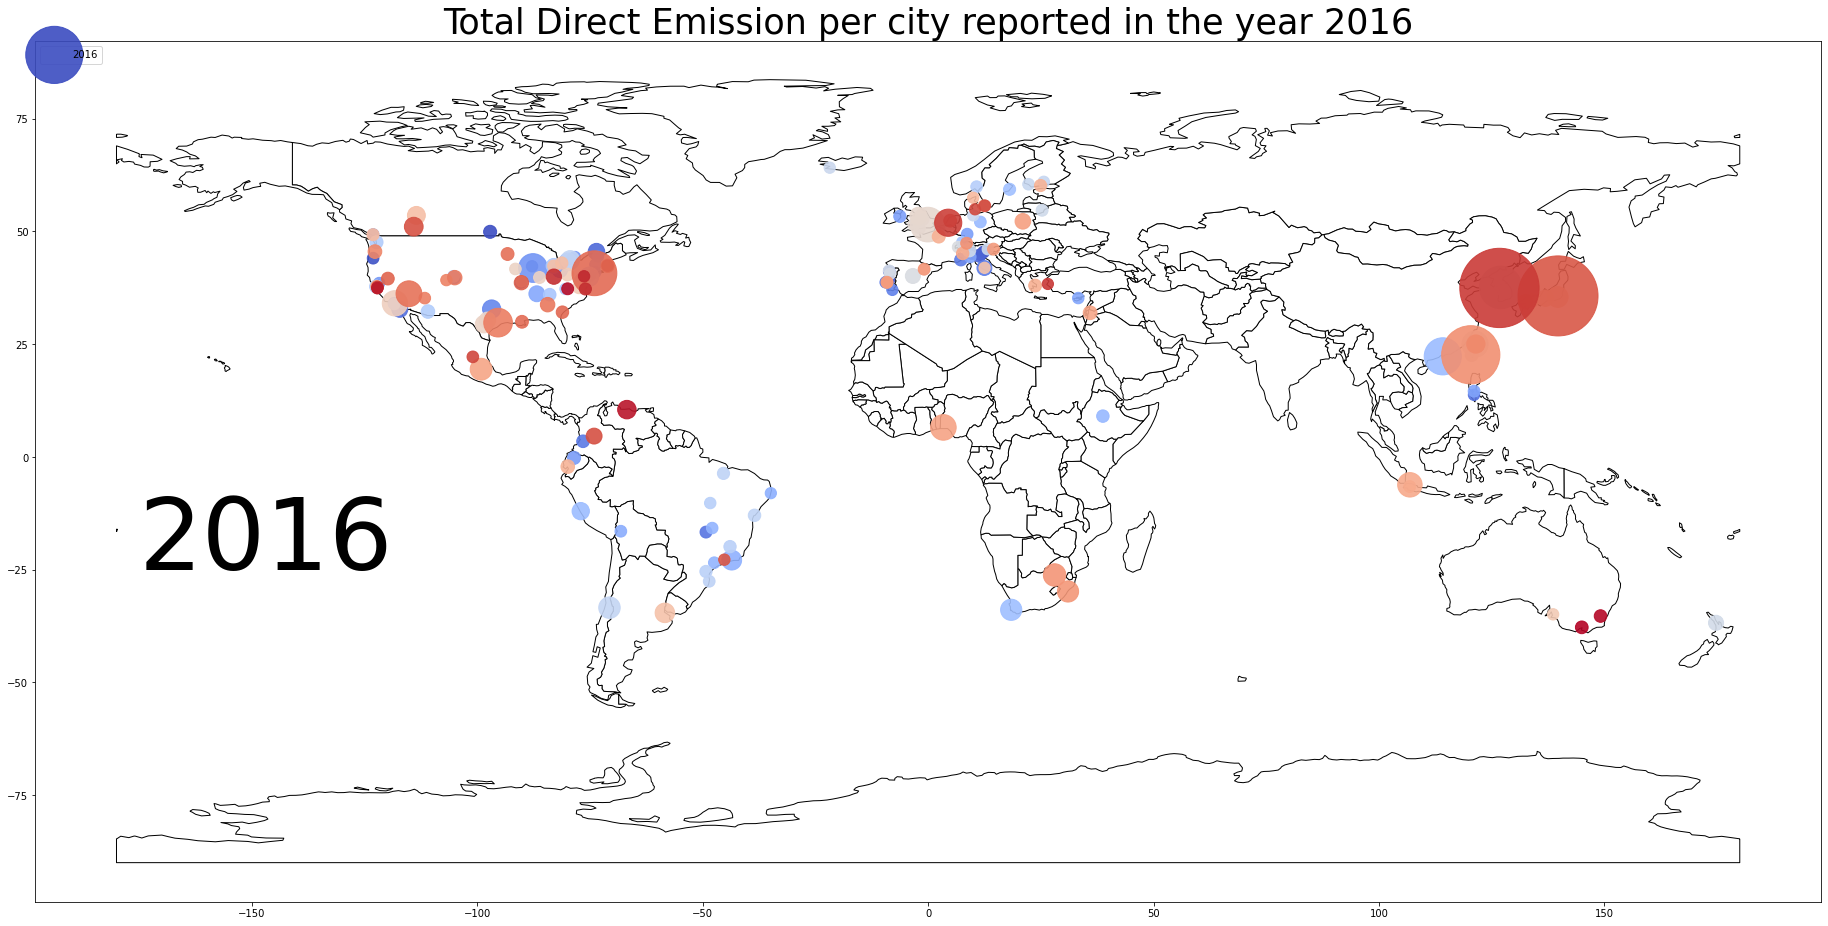

In [ ]:
# df_2016.rename(columns={df_2016.columns[15]: "D_Emm_1", df_2016.columns[16]: "D_Emm_2"}, inplace=True)
df_2016['Longitude'] = 0.0
df_2016['Latitude'] = 0.0
for index,row in df_2016.iterrows():
    start = row['City Location'].find('(')
    end = row['City Location'].find(')')
    loc = row['City Location'][start+1:end]
    lng, lat = loc.split()
    df_2016['Latitude'][index] = lng[:-2]
    df_2016['Longitude'][index] = lat[:-1]

    if pd.isna(row['Measurement Year\xa0'])==False:
      acYear = row['Measurement Year\xa0']
      if type(acYear)=='str':
        Year = acYear[:4]
        df_2016['Measurement Year\xa0'][index] = Year

df_2016 = df_2016[['City Name\xa0', 'Country\xa0', 'Measurement Year\xa0', 'Total City-wide Emissions (metric tonnes CO2e)\xa0', 'Longitude', 'Latitude']]
df_2016 = df_2016.dropna()
total_norm = sc.fit_transform(df_2016['Total City-wide Emissions (metric tonnes CO2e)\xa0'].to_numpy().reshape(-1, 1))
df_2016['TOTAL_NORM'] = total_norm
# df_2016
s = df_2016['TOTAL_NORM']
s_exp = pd.Series([200*2**n for n in s])
df_2016_gdf = gpd.GeoDataFrame(
    df_2016, geometry=gpd.points_from_xy(df_2016['Longitude'], df_2016['Latitude']))
ax = world.plot(color='white', edgecolor='black', figsize=(32,16))
df_2016_gdf.plot(ax=ax, markersize=s_exp, cmap='coolwarm', marker='o', alpha=0.9, label='2016')
plt.text(-175, -25, '2016', fontsize=100)
plt.title('Total Direct Emission per city reported in the year 2016', fontdict = {'fontsize' : 35})
plt.savefig('output_2016.jpg', format='jpg', dpi=400)
plt.legend(loc=2)
plt.show()